# mini_proj_02_20171541_차영민

## pandas로 파일 받기

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

from sklearn.utils import shuffle

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "mini_proj_04_20171541"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import numpy as np
import pandas as pd

input_file = "winequality-red.csv"
df = pd.read_csv(input_file)
df = shuffle(df, random_state = 42)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 803 to 1126
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


1. fixed acidity = 고정 산도
2. volatile acidty = 휘발 산도
3. citric acid = 시트르산
4. residual sugar = 잔류 설탕
5. chlorides = 염화물
6. free sulfur dioxide = 자유 이산화황
7. total sulfur dioxide = 총 이산화황
8. density = 밀도
9. pH = pH
10. sulphates = 황산염
11. alcohol = 알코올
12. quality = 품질(타겟)

## 비어있는 값 없음

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.560,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6
124,7.8,0.500,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5
350,10.7,0.670,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
682,8.5,0.460,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5
1326,6.7,0.460,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.90,0.058,5.0,10.0,0.99770,3.18,0.63,10.4,6
1294,8.2,0.635,0.10,2.10,0.073,25.0,60.0,0.99638,3.29,0.75,10.9,6
860,7.2,0.620,0.06,2.70,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,5
1459,7.9,0.200,0.35,1.70,0.054,7.0,15.0,0.99458,3.32,0.80,11.9,7


## 특성조합

In [5]:
df["pH - sulphates"] = df["pH"] - df["sulphates"]
df["citric acid - density"] = df["citric acid"] - df["density"]
df["alcohol + residual sugar"] = df["alcohol"] + df["residual sugar"]
df["fixed acidity / density"] = df["fixed acidity"] / df["density"]
df["total sulfur dioxide / alcohol"] = df["total sulfur dioxide"] / df["alcohol"]
df["test"] = df["total sulfur dioxide"] / df["free sulfur dioxide"]
df["test - alcohol"] = df["test"] - df["alcohol"]
df["test / residual sugar"] = df["test"] / df["residual sugar"]
df["citric acid / chlorides"] = df["citric acid"] / df["chlorides"]
df["volatile acidity * sulphates"] = df["volatile acidity"] * df["sulphates"]

## quality와 상관계수 확인

In [6]:
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                           1.000000
alcohol                           0.476166
citric acid / chlorides           0.295936
alcohol + residual sugar          0.292214
sulphates                         0.251397
citric acid - density             0.228867
citric acid                       0.226373
fixed acidity / density           0.126257
fixed acidity                     0.124052
residual sugar                    0.013732
free sulfur dioxide              -0.050656
pH                               -0.057731
test / residual sugar            -0.111417
test                             -0.124336
chlorides                        -0.128907
density                          -0.174919
total sulfur dioxide             -0.185100
volatile acidity * sulphates     -0.185151
pH - sulphates                   -0.205515
total sulfur dioxide / alcohol   -0.240199
test - alcohol                   -0.300563
volatile acidity                 -0.390558
Name: quality, dtype: float64

In [7]:
corr_matrix = df.corr()
corr_matrix["test"].sort_values(ascending=False)

test                              1.000000
test - alcohol                    0.914568
test / residual sugar             0.897786
total sulfur dioxide / alcohol    0.338541
total sulfur dioxide              0.331133
density                           0.138697
volatile acidity * sulphates      0.095498
chlorides                         0.081575
citric acid                       0.067317
citric acid - density             0.066205
sulphates                         0.055982
volatile acidity                  0.053302
residual sugar                    0.050021
fixed acidity                     0.029710
fixed acidity / density           0.028599
citric acid / chlorides           0.023295
alcohol + residual sugar         -0.058162
pH - sulphates                   -0.104734
pH                               -0.108620
quality                          -0.124336
alcohol                          -0.164572
free sulfur dioxide              -0.217280
Name: test, dtype: float64

## x_train, quality_label(y_train)으로 나누기

In [8]:
x_train = df.drop(["quality", "residual sugar","density"], axis = 1)
quality_label = df["quality"].copy()
x_train

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,pH - sulphates,citric acid - density,alcohol + residual sugar,fixed acidity / density,total sulfur dioxide / alcohol,test,test - alcohol,test / residual sugar,citric acid / chlorides,volatile acidity * sulphates
803,7.7,0.560,0.08,0.114,14.0,46.0,3.24,0.66,9.6,2.58,-0.91710,12.10,7.722395,4.791667,3.285714,-6.314286,1.314286,0.701754,0.36960
124,7.8,0.500,0.17,0.082,21.0,102.0,3.39,0.48,9.5,2.91,-0.82600,11.10,7.831325,10.736842,4.857143,-4.642857,3.035714,2.073171,0.24000
350,10.7,0.670,0.22,0.107,17.0,34.0,3.28,0.98,9.9,2.30,-0.78040,12.60,10.695722,3.434343,2.000000,-7.900000,0.740741,2.056075,0.65660
682,8.5,0.460,0.31,0.078,32.0,58.0,3.33,0.54,9.8,2.79,-0.68800,12.05,8.517034,5.918367,1.812500,-7.987500,0.805556,3.974359,0.24840
1326,6.7,0.460,0.24,0.077,18.0,34.0,3.39,0.60,10.6,2.79,-0.75480,12.30,6.735022,3.207547,1.888889,-8.711111,1.111111,3.116883,0.27600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,0.058,5.0,10.0,3.18,0.63,10.4,2.55,-0.99770,12.30,9.120978,0.961538,2.000000,-8.400000,1.052632,0.000000,0.37800
1294,8.2,0.635,0.10,0.073,25.0,60.0,3.29,0.75,10.9,2.54,-0.89638,13.00,8.229792,5.504587,2.400000,-8.500000,1.142857,1.369863,0.47625
860,7.2,0.620,0.06,0.077,15.0,85.0,3.51,0.54,9.5,2.97,-0.93746,12.20,7.218335,8.947368,5.666667,-3.833333,2.098765,0.779221,0.33480
1459,7.9,0.200,0.35,0.054,7.0,15.0,3.32,0.80,11.9,2.52,-0.64458,13.60,7.943051,1.260504,2.142857,-9.757143,1.260504,6.481481,0.16000


In [9]:
quality_label

803     6
124     5
350     6
682     5
1326    6
       ..
1130    6
1294    6
860     5
1459    7
1126    6
Name: quality, Length: 1599, dtype: int64

## 스케일러

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy = "median"))
])

x_train = num_pipeline.fit_transform(x_train)

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

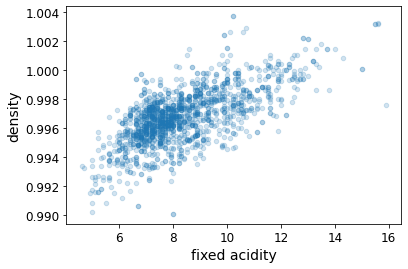

In [11]:
wine = df.copy()
wine.plot(kind="scatter", x = "fixed acidity", y = "density", alpha = 0.2)

In [12]:
quality_label_train = quality_label.to_numpy()
quality_label_train

array([6, 5, 6, ..., 5, 7, 6], dtype=int64)

## AdaBoost

In [13]:
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

ada_reg = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(random_state = 42),
                           random_state = 42)
ada_reg.fit(x_train, quality_label)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                  random_state=42)

## CV10

In [14]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean(평균오차):", scores.mean())
    print("Standard deviation(표준편차):", scores.std())

In [15]:
from sklearn.model_selection import cross_val_score

ada_scores = cross_val_score(ada_reg, x_train, quality_label,
                                scoring="neg_mean_squared_error", cv=10)
ada_rmse_scores = np.sqrt(-ada_scores)
display_scores(ada_rmse_scores)

Scores: [0.59686682 0.62749502 0.65669628 0.59686682 0.60207973 0.65192024
 0.5809475  0.59686682 0.55339859 0.57735027]
Mean(평균오차): 0.6040488085785825
Standard deviation(표준편차): 0.030957554621262234


## 조기종료 방식으로 하이퍼파라미터 조정

#### n_estimators, max_depth

In [16]:
def cv10(model, x_train, y_train):
    cv10_scores = cross_val_score(model,x_train,y_train, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-cv10_scores)
    return rmse_scores.mean()

In [17]:
basic_max_depth = 2

ada1_reg = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(random_state=42,
                                                                    max_depth=basic_max_depth),
                           random_state = 42)

min_val_error = 20000
error_ada_n_estimators = 0
error_ada_max_depth = 0
best_ada_n_estimators = 0
best_ada_max_depth = 0
for n_estimators in range(60,1000,1):
    for basic_max_depth in range(2,50,1):
        ada1_reg = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(random_state=42,
                                                                    max_depth=basic_max_depth),
                           random_state = 42)
        ada1_reg.n_estimators = n_estimators
        ada1_reg.fit(x_train, quality_label)
        mean = cv10(ada1_reg,x_train, quality_label)
        if mean < min_val_error:
            min_val_error = mean
            error_ada_max_depth = 0
            error_ada_n_estimators = 0
            print(f"mean: {min_val_error}, n_estimators: {n_estimators}, max_depth: {basic_max_depth}")
            best_ada_n_estimators = n_estimators
            best_ada_max_depth = basic_max_depth
        else:
            error_ada_max_depth += 1
            if error_ada_max_depth > best_ada_max_depth:
                break
    error_ada_max_depth = 0
    error_ada_n_estimators +=1
    print(f"n_estimators up! n_estimators : {n_estimators + 1}")
    if error_ada_n_estimators > 10:
        print(f"max_depth : {best_ada_max_depth}, n_estimators : {best_ada_n_estimators}")
        break

mean: 0.6577951070205612, n_estimators: 60, max_depth: 2
mean: 0.6368904099244562, n_estimators: 60, max_depth: 3
mean: 0.6325177961667403, n_estimators: 60, max_depth: 4
mean: 0.6203834457932387, n_estimators: 60, max_depth: 5
mean: 0.6022264677304296, n_estimators: 60, max_depth: 6
mean: 0.5930804788948392, n_estimators: 60, max_depth: 7
mean: 0.5854504179002766, n_estimators: 60, max_depth: 8
mean: 0.5792308993269983, n_estimators: 60, max_depth: 9
mean: 0.5730850022079619, n_estimators: 60, max_depth: 10
mean: 0.5725959744911433, n_estimators: 60, max_depth: 11
mean: 0.5627192171140734, n_estimators: 60, max_depth: 12
n_estimators up! n_estimators : 61
mean: 0.5621872706442724, n_estimators: 61, max_depth: 12
n_estimators up! n_estimators : 62
n_estimators up! n_estimators : 63
mean: 0.5607320388409871, n_estimators: 63, max_depth: 12
n_estimators up! n_estimators : 64
n_estimators up! n_estimators : 65
n_estimators up! n_estimators : 66
n_estimators up! n_estimators : 67
n_estimat

63,12 -> 0.5607320388409871

In [18]:
best_ada_n_estimators

63

In [19]:
best_ada_max_depth

12

## 조정된 하이퍼파라미터로 fit

In [20]:
ada_best_reg = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(random_state=42,
                                                                    max_depth=best_ada_max_depth),
                           random_state = 42, n_estimators = best_ada_n_estimators)
ada_best_reg.fit(x_train, quality_label)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12,
                                                       random_state=42),
                  n_estimators=63, random_state=42)

In [21]:
cv10(ada_best_reg, x_train, quality_label)

0.5607320388409871

## ExtraTrees

###### 조기종료(n_estimators, max_depth)

In [22]:
ex_reg = ExtraTreesRegressor(random_state=42)

min_val_error = 20000
error_ex_depth = 0
error_ex_n_estimators = 0
best_ex_n_estimators = 0
best_ex_max_depth = 0
for n_estimators in range(50,1000,1):
    for max_depth in range(2,100,1):
        ex_reg.n_estimators = n_estimators
        ex_reg.max_depth = max_depth
        ex_reg.fit(x_train, quality_label)
        mean = cv10(ex_reg,x_train, quality_label)
        if mean < min_val_error:
            min_val_error = mean
            error_ex_depth = 0
            error_ex_n_estimators = 0
            print(f"cv: {min_val_error}, n_estimators: {n_estimators} , max_depth : {max_depth}")
            best_ex_max_depth = max_depth
            best_ex_n_estimators = n_estimators
        else:
            error_ex_depth += 1
            if error_ex_depth > best_ex_max_depth:
                break
    error_ex_n_estimators += 1
    error_ex_depth = 0
    print(f"n_estimators going up! n_estimators : {n_estimators + 1}")
    if error_ex_n_estimators > 10:
        print(f"best_ex_n_estimators : {best_ex_n_estimators} , best_ex_max_depth : {best_ex_max_depth}")
        break

cv: 0.6914077765723146, n_estimators: 50 , max_depth : 2
cv: 0.6663839038472261, n_estimators: 50 , max_depth : 3
cv: 0.6449601570317391, n_estimators: 50 , max_depth : 4
cv: 0.6284585072303327, n_estimators: 50 , max_depth : 5
cv: 0.6168339109185793, n_estimators: 50 , max_depth : 6
cv: 0.607493980259794, n_estimators: 50 , max_depth : 7
cv: 0.5922510358463162, n_estimators: 50 , max_depth : 8
cv: 0.5820051052055482, n_estimators: 50 , max_depth : 9
cv: 0.5730186681747467, n_estimators: 50 , max_depth : 10
cv: 0.5622289196293646, n_estimators: 50 , max_depth : 11
cv: 0.5615071513641632, n_estimators: 50 , max_depth : 12
cv: 0.5527715846730099, n_estimators: 50 , max_depth : 13
cv: 0.5502527533077444, n_estimators: 50 , max_depth : 14
cv: 0.5466215147167567, n_estimators: 50 , max_depth : 15
cv: 0.54660037737376, n_estimators: 50 , max_depth : 18
cv: 0.5444019528983982, n_estimators: 50 , max_depth : 19
cv: 0.5442797607156884, n_estimators: 50 , max_depth : 20
cv: 0.5411372705295847, n

In [23]:
ex_best_reg = ExtraTreesRegressor(random_state=42, n_estimators = best_ex_n_estimators, max_depth = best_ex_max_depth)
ex_best_reg.fit(x_train, quality_label)

ExtraTreesRegressor(max_depth=26, n_estimators=53, random_state=42)

In [24]:
cv10(ex_best_reg, x_train, quality_label)

0.5396996645337289

## GBRT

###### 조기종료 방식

In [26]:
gbrt_reg = GradientBoostingRegressor(random_state=42)

min_val_error = 20000
error_gbrt_depth = 0
error_gbrt_n_estimators = 0
best_gbrt_n_estimators = 0
best_gbrt_max_depth = 0
for n_estimators in range(550,1000,10):
    for max_depth in range(2,50,1):
        gbrt_reg.n_estimators = n_estimators
        gbrt_reg.max_depth = max_depth
        gbrt_reg.fit(x_train, quality_label)
        mean = cv10(gbrt_reg,x_train, quality_label)
        if mean < min_val_error:
            min_val_error = mean
            error_gbrt_depth = 0
            error_gbrt_n_estimators = 0
            print(f"cv: {min_val_error}, n_estimators: {n_estimators} , max_depth : {max_depth}")
            best_gbrt_max_depth = max_depth
            best_gbrt_n_estimators = n_estimators
        else:
            error_gbrt_depth += 1
            if error_gbrt_depth > best_gbrt_max_depth:
                break
    error_gbrt_n_estimators += 1
    error_gbrt_depth = 0
    print(f"n_estimators going up! n_estimators : {n_estimators + 10}")
    if error_gbrt_n_estimators > 5:
        print(f"best_gbrt_n_estimators : {best_gbrt_n_estimators} , best_gbrt_max_depth : {best_gbrt_max_depth}")
        break

cv: 0.6002012868956867, n_estimators: 550 , max_depth : 2
cv: 0.5785134964661907, n_estimators: 550 , max_depth : 3
cv: 0.5674682660570869, n_estimators: 550 , max_depth : 4
cv: 0.5612821948653217, n_estimators: 550 , max_depth : 6
n_estimators going up! n_estimators : 560
cv: 0.5612728025768553, n_estimators: 560 , max_depth : 6
n_estimators going up! n_estimators : 570
cv: 0.5612649906053342, n_estimators: 570 , max_depth : 6
n_estimators going up! n_estimators : 580
n_estimators going up! n_estimators : 590
n_estimators going up! n_estimators : 600
n_estimators going up! n_estimators : 610
n_estimators going up! n_estimators : 620
n_estimators going up! n_estimators : 630
best_gbrt_n_estimators : 570 , best_gbrt_max_depth : 6


In [27]:
gbrt_best_reg = GradientBoostingRegressor(n_estimators=best_gbrt_n_estimators, max_depth = best_gbrt_max_depth, random_state=42)
gbrt_best_reg.fit(x_train, quality_label)

GradientBoostingRegressor(max_depth=6, n_estimators=570, random_state=42)

In [28]:
cv10(gbrt_best_reg, x_train, quality_label)

0.5612649906053342

## Voting(Extra, GBRT, Ada)

In [29]:
vot_final_reg = VotingRegressor(estimators = 
                         [('ex', ex_best_reg),('gbrt', gbrt_best_reg), ('ada', ada_best_reg)])
vot_final_reg.fit(x_train, quality_label)

VotingRegressor(estimators=[('ex',
                             ExtraTreesRegressor(max_depth=26, n_estimators=53,
                                                 random_state=42)),
                            ('gbrt',
                             GradientBoostingRegressor(max_depth=6,
                                                       n_estimators=570,
                                                       random_state=42)),
                            ('ada',
                             AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12,
                                                                                    random_state=42),
                                               n_estimators=63,
                                               random_state=42))])

## display_scores

In [30]:
from sklearn.model_selection import cross_val_score

vot_scores = cross_val_score(vot_final_reg, x_train, quality_label,
                                scoring="neg_mean_squared_error", cv=10)
vot_rmse_scores = np.sqrt(-vot_scores)
display_scores(vot_rmse_scores)

Scores: [0.53463359 0.50825033 0.56600296 0.52562499 0.54878722 0.58878291
 0.53809658 0.56700922 0.50182275 0.50670993]
Mean(평균오차): 0.5385720479810194
Standard deviation(표준편차): 0.0276678212532427


## Mean : 0.5385720479810194